Sojeong Yang<br>
CSC 578 Homework 6

# CSC 578 NN&DL Fall 2020
## HW\#6 - Image Classification using CNN


This code is slightly modified from the TensorFlow tutorial  ["Convolutional Neural Network (CNN)"](https://www.tensorflow.org/tutorials/images/cnn) for the purpose of our homework. The code first downloads the data, the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) and partitions the training set into training and validation sets.  Then the code builds a CNN network and trains the network with the training set. Finally the code evaluates the network performance using the validation set.
<p>
Note that there are <b>three places</b> in the code, indicated with <b>**IMPORTANT**</b>, where you choose the syntax that works for the version of TensorFlow (1 or 2) installed on your platform.


### Import TensorFlow
**\*\*IMPORTANT (1) \*\*** Uncomment either import line(s) for the version of TensorFlow (TF1 or TF2) of your platform.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

print(tf.__version__) # check the TF version!


2.3.1


In [15]:
## For TF version 2 (just one line)
from tensorflow.keras import datasets, layers, models

## For TF version 1 (need both lines)
#from tensorflow import keras
#from keras import datasets, layers, models

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is (pre-)divided into 50,000 training images and 10,000 testing images.

In [16]:
# Download the data from the repository site.
(train_all_images, train_all_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [17]:
# !! DO NOT REMOVE THIS LINE !!
# Delete test_labels (by making it an empty list) so that we don't accidentally
# use it in the code.
test_labels = []

# Then split the training set ('train_all') into two subsets: train and 
# validation.  After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by using stratefied sampling.  
train_images, valid_images, train_labels, valid_labels \
  = train_test_split(train_all_images, train_all_labels,
                     stratify=train_all_labels, test_size=0.2)

In [18]:
# Normalize pixel values of images to be between 0 and 1
train_images, valid_images, test_images \
  = train_images / 255.0, valid_images / 255.0, test_images / 255.0

In [19]:
train_labels

array([[5],
       [9],
       [4],
       ...,
       [9],
       [0],
       [9]], dtype=uint8)

In [20]:
valid_labels

array([[3],
       [8],
       [0],
       ...,
       [1],
       [0],
       [2]], dtype=uint8)

### Verify the data

To verify that the dataset looks correct, plot the first 10 images from the training set and display the class name below each image.


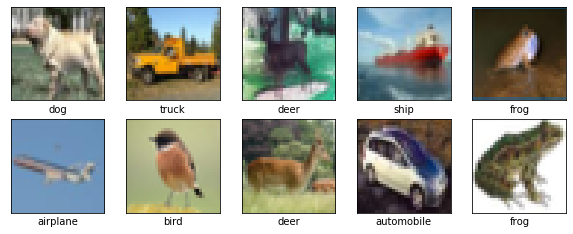

In [21]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create a convolutional Network

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size, where color_channels refers to (R,G,B). The format of CIFAR images is 32 * 32 pixels, so the input shape is (32, 32, 3).
The output layer has 10 nodes, corresponding to the number of categories of the images.  
In this code, the activation function of the output layer is specified to be softmax for the purpose of aligning the two versions of TensorFlow (TF1 and TF2; in particular to make TF2  compatible with TF1's 'sparse_categorical_crossentropy' loss function).


In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
                        
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Verify the model.

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

### Compile the model
**\*\*IMPORTANT (2) \*\*** Uncomment either loss function for the version of TensorFlow (TF1 or TF2) of your platform.

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              metrics=['accuracy'])

### Train the model

In [25]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(valid_images, valid_labels)) # 5/2020 nt: use validation set

Epoch 1/10
1250/1250 [==============================] - 64s 51ms/step - loss: 1.6256 - accuracy: 0.3981 - val_loss: 1.3507 - val_accuracy: 0.5240
Epoch 2/10
1250/1250 [==============================] - 66s 53ms/step - loss: 1.2208 - accuracy: 0.5613 - val_loss: 1.1319 - val_accuracy: 0.5941
Epoch 3/10
1250/1250 [==============================] - 64s 51ms/step - loss: 1.0625 - accuracy: 0.6207 - val_loss: 0.9958 - val_accuracy: 0.6463
Epoch 4/10
1250/1250 [==============================] - 65s 52ms/step - loss: 0.9591 - accuracy: 0.6623 - val_loss: 0.9200 - val_accuracy: 0.6776
Epoch 5/10
1250/1250 [==============================] - 68s 55ms/step - loss: 0.8730 - accuracy: 0.6917 - val_loss: 0.8471 - val_accuracy: 0.6998
Epoch 6/10
1250/1250 [==============================] - 67s 53ms/step - loss: 0.8201 - accuracy: 0.7110 - val_loss: 0.8058 - val_accuracy: 0.7178
Epoch 7/10
1250/1250 [==============================] - 67s 54ms/step - loss: 0.7756 - accuracy: 0.7264 - val_loss: 0.8021 -

### Evaluate the model
**\*\*IMPORTANT (3) \*\*** Uncomment either syntax for the version of TensorFlow (TF1 or TF2) of your platform.

313/313 - 2s - loss: 0.7429 - accuracy: 0.7453
valid_accuracy=0.7452999949455261, valid_loss=0.7428522706031799


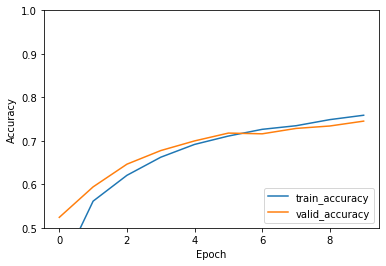

In [26]:
plt.plot(history.history['accuracy'], label='train_accuracy') 
plt.plot(history.history['val_accuracy'], label = 'valid_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

### **TO DO** -- Make Predictions
Apply the learned network to **'test_images'** and generate predictions.

Look at the code from HW#4 or other tutorial code for the syntax.  You generate predictions and create/write a KAGGLE submission file.

In [27]:
predictions = model.predict(test_images)

In [28]:
predictions[0]

array([7.7652541e-04, 4.1370219e-04, 9.9957231e-03, 5.9319139e-01,
       3.8720241e-03, 3.3115968e-01, 5.5996172e-02, 2.4962227e-03,
       8.9942513e-04, 1.1991271e-03], dtype=float32)

In [29]:
np.argmax(predictions[0])

3

In [30]:
pred_dataf = pd.DataFrame(predictions, columns = ['cat0' ,'cat1', 'cat2', 'cat3', 'cat4',
                                                    'cat5', 'cat6', 'cat7', 'cat8', 'cat9'])
pred_dataf.index = np.arange(1, len(pred_dataf)+1)
display(pred_dataf)
pred_dataf.to_csv('prediction.csv', index_label='id')

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
1,7.765254e-04,4.137022e-04,9.995723e-03,5.931914e-01,3.872024e-03,3.311597e-01,5.599617e-02,2.496223e-03,8.994251e-04,1.199127e-03
2,4.185162e-04,3.149567e-02,2.825330e-07,2.456883e-06,2.389758e-08,1.852666e-08,1.625654e-07,1.525124e-09,9.678913e-01,1.916501e-04
3,6.125001e-02,1.321103e-01,3.170449e-02,1.559777e-02,5.996143e-03,8.487936e-03,2.031398e-03,1.215113e-03,6.301608e-01,1.114461e-01
4,8.832300e-01,7.893165e-03,1.741386e-02,9.150674e-04,9.557828e-04,5.531625e-05,2.150928e-04,1.031832e-05,8.859185e-02,7.195439e-04
5,1.099533e-05,3.437560e-05,2.289184e-02,2.719513e-02,7.988409e-02,1.808150e-03,8.681371e-01,4.486325e-06,2.618657e-05,7.542141e-06
...,...,...,...,...,...,...,...,...,...,...
9996,2.565216e-01,3.703458e-04,2.334410e-02,5.067087e-01,9.337778e-03,1.228834e-01,1.357788e-03,1.915517e-03,7.601082e-02,1.550045e-03
9997,3.111010e-06,2.947884e-06,8.352435e-03,3.035154e-01,1.039049e-01,3.617238e-01,2.220040e-01,4.348319e-04,1.056887e-06,5.751587e-05
9998,9.783731e-06,3.920520e-08,4.964262e-03,3.369141e-02,2.385864e-04,9.517514e-01,7.793991e-05,9.265004e-03,1.070448e-06,6.769392e-07
9999,3.780600e-01,3.179582e-02,2.913542e-02,1.494475e-02,4.671042e-01,1.278786e-02,3.388939e-03,5.622989e-02,2.102123e-03,4.450876e-03
